## 1. Machine Learning in Python.
At the last classes we've discussed basic yet interesting ML project example. We've started with getting to know required modules and given data. Starting from importing required data from sklearn datasets, we've moved on to visualizing and understanding the data using plots from seaborn module.

In [4]:
import seaborn as sns
from sklearn.datasets import load_iris

iris_dataset = load_iris()

print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

As you can see, there are three __types__ of the irises in the dataset. Every iris is described by 4 __features__ : 

sepal length, petal length, sepal width and petal width.


In [5]:
print(f"Class: {iris_dataset['target_names']}")
print(f"Features: \n{iris_dataset['feature_names']}")
print(f"Data:{iris_dataset['data'][:10]}")

Class: ['setosa' 'versicolor' 'virginica']
Features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


To visualize dataset the __sns.pairplot()__ comes in handy. The __pairplot()__ function allows to plot the data in various ways but to keep the report brief I'm showing only the basic way. But before that we need to prepare the dataframe that we want to fit into the plot.


Features: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


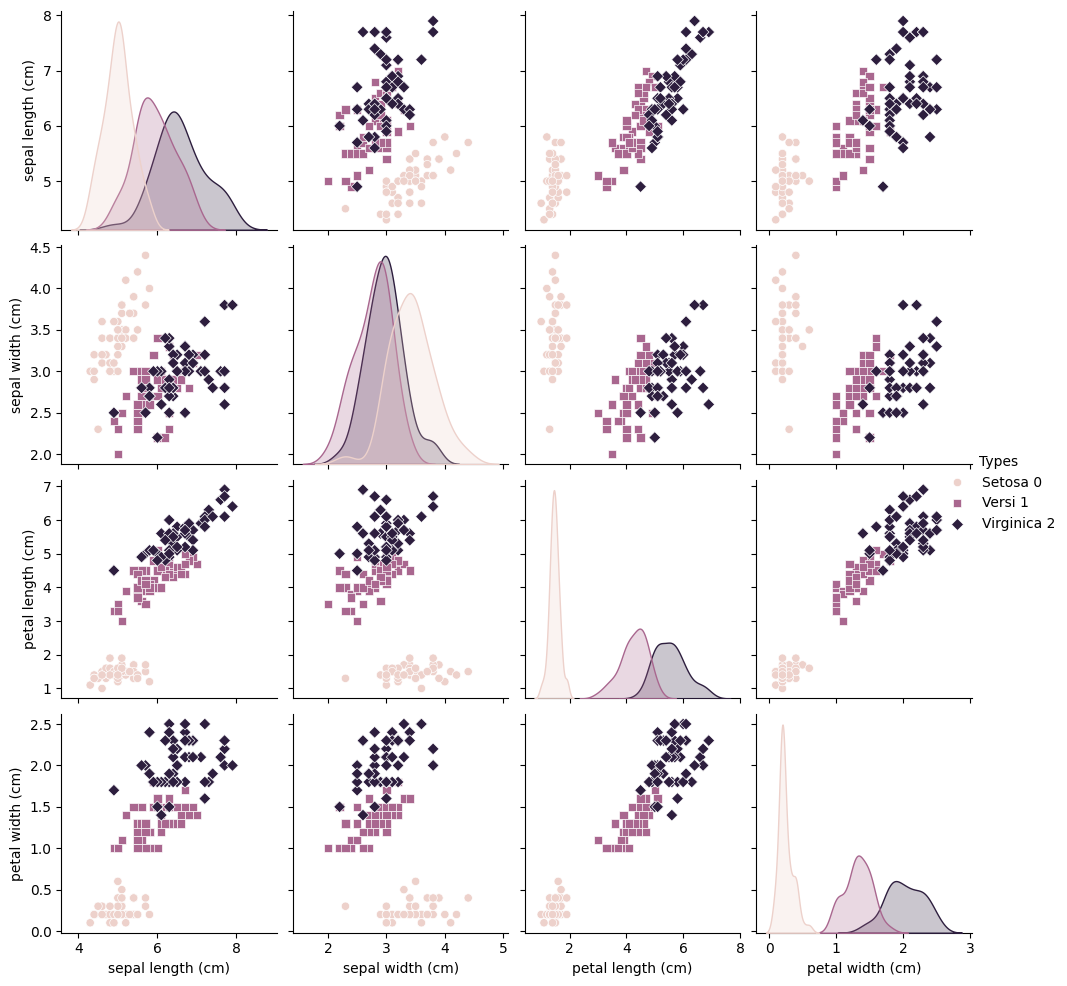

In [6]:
import pandas as pd
import numpy as np

title = "Types"
new_labels = ["Setosa 0","Versi 1", "Virginica 2"]

data_iris = pd.DataFrame(data = np.c_[iris_dataset['data'], # converting iris_databes to fit required pandas data frame
                         iris_dataset['target']],
                         columns = iris_dataset['feature_names'] + ['target'])

print(f"Features: {data_iris.keys()}")

plot = sns.pairplot(data=data_iris, hue = 'target', markers=["o", "s", "D"])



plot.legend.set_title(title) # changing labels of a legend
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

As we can see here, there are some patterns that indicate the data corelation as shown in the example:

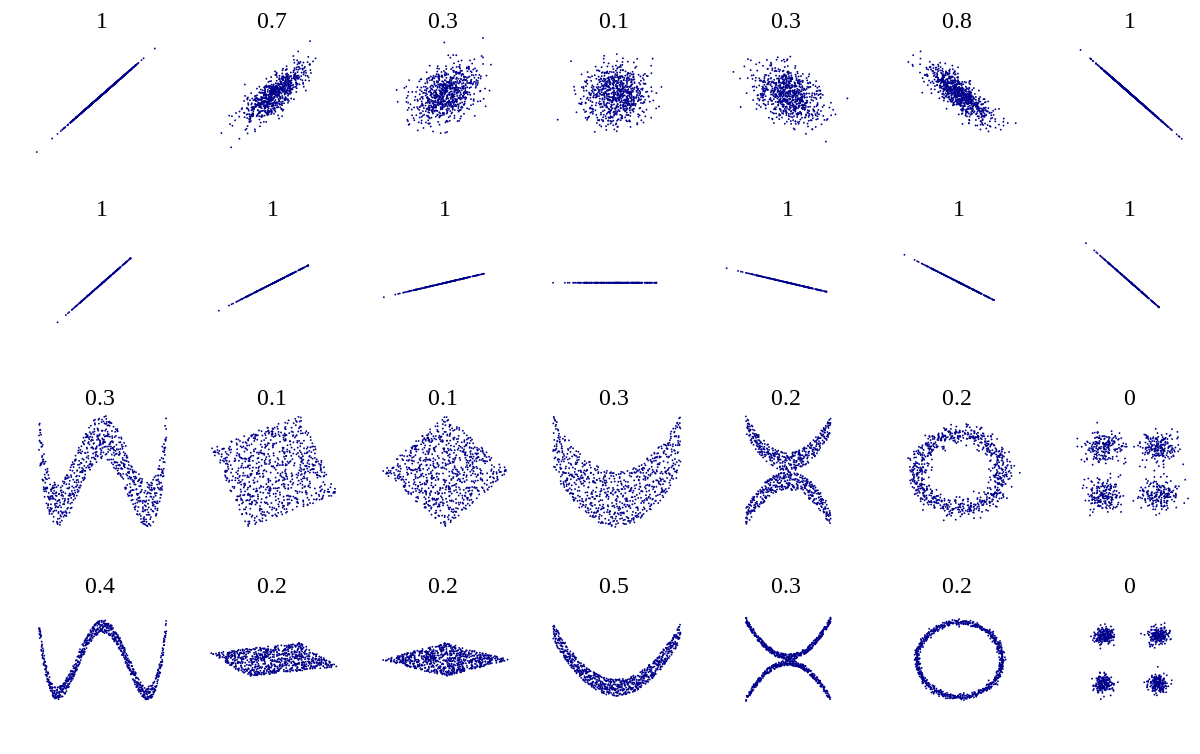

## 2."TODO" part :)

In this part of the classes we were asked to:
1. work on loss function using MRS method
2. implement linear regression algorithm
3. investigate the influency of the initial parameters a,b on the stability of the algorithm.
4. Change the values of parameter *y* to non-linear and study the stability of the algorithm.

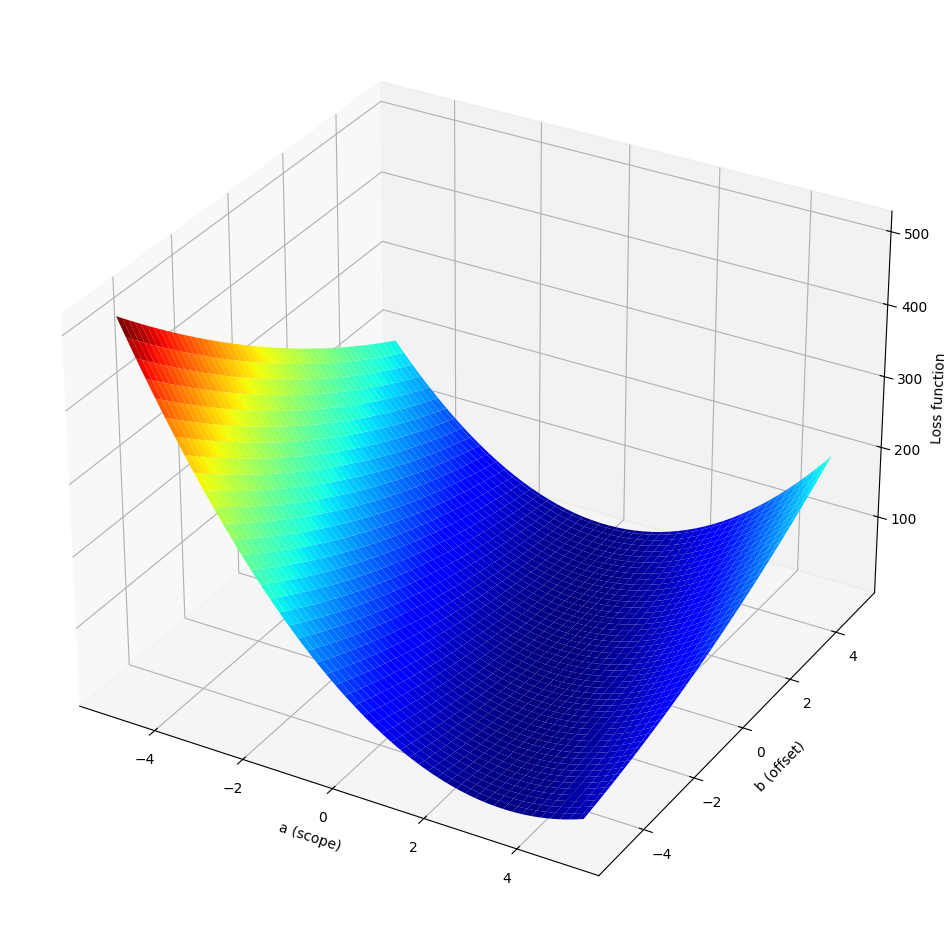

In [14]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 12)

def get_cost(A,B):  # loss function
  
  x = np.array([1,2,3,4])
  y = np.array([1.2,2.8,5.3,6.4])
  loss = 0
  
  for i,j in zip(x,y):
    loss += (j - (A*i + B)) ** 2
  
  return loss / len(y)
  

a = np.linspace(-5,5,100)
b = np.linspace(-5,5,100)

A, B = np.meshgrid(a,b)  #
cost_grid = get_cost(A,B)

ax = plt.axes(projection = '3d')
ax.set_xlabel('a (scope)')
ax.set_ylabel('b (offset)')
ax.set_zlabel('Loss function')
ax.plot_surface(A, B, cost_grid, cmap = 'jet')

1.3093360491074117 0.8720128894233633


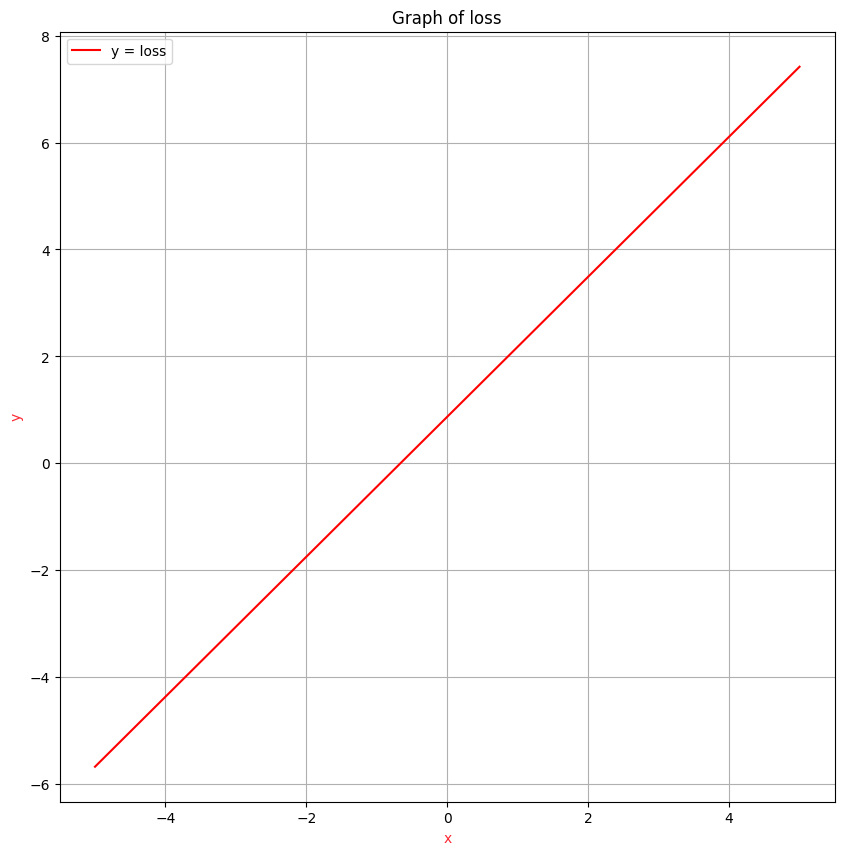

In [8]:
# linear regression algorithm

x = np.array([1, 2, 3, 4])
y = np.array([1.2, 2.8, 5.3, 6.4])
a, b = 0, 1
eta = 0.001
epochs = 1000

def linear_reg(x, y, a, b, eta, epochs):
  
  mse = 0
  all_mse = []

  for i in range(epochs):
    a_dif = 0.0
    b_dif = 0.0

    for i,j in zip(x,y):
      a_dif += -2*i*(j - (a*i+b))
      b_dif += -2*(j - (a*i+b))

    a_dif = a_dif / len(x)
    b_dif = b_dif / len(x)

    a = a - a_dif * eta
    b = b - b_dif * eta

    mse = get_cost(a,b)

    all_mse.append(mse)
    
  return a, b, all_mse, mse

a, b, all_mse, mse = linear_reg(x, y, a, b, eta, epochs)

print(a,b)

plt.rcParams["figure.figsize"] = (10, 10)

x = np.linspace(-5,5,100)
y = a*x+b
plt.plot(x, y, '-r', label='y = loss')
plt.title('Graph of loss')
plt.xlabel('x', color='#FD2833')
plt.ylabel('y', color='#FD2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()


Investigating the 'a' parameter:

Start value of 'a': 0 calculated a: 1.3093360491074117 calculated b: 0.8720128894233633
Start value of 'a': 1 calculated a: 1.415114711466266 calculated b: 0.5610108591284126
Start value of 'a': 2 calculated a: 1.5622492592163122 calculated b: 0.12841747369340595
Start value of 'a': 3 calculated a: 1.7368598081332087 calculated b: -0.38495871167698376
Start value of 'a': 4 calculated a: 1.9297248481093554 calculated b: -0.9520053307544715
Start value of 'a': 5 calculated a: 2.134717797158175 calculated b: -1.554709484067115
Start value of 'a': 6 calculated a: 2.3477682799940256 calculated b: -2.1811037710326775
Start value of 'a': 7 calculated a: 2.566172022846931 calculated b: -2.8232372964097405
Start value of 'a': 8 calculated a: 2.788132361746169 calculated b: -3.4758276486415247
Start value of 'a': 9 calculated a: 3.0124556300373118 calculated b: -4.135365301944102


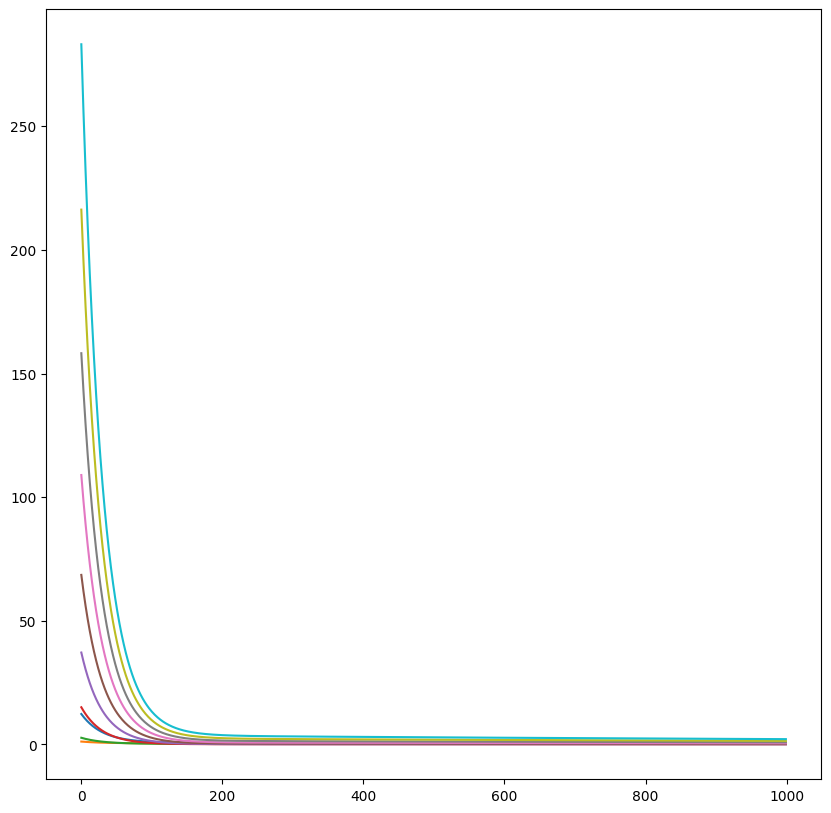

In [9]:
x = np.array([1, 2, 3, 4])
y = np.array([1.2, 2.8, 5.3, 6.4])
a, b = 1, 1
eta = 0.001
epochs = 1000
plt.rcParams["figure.figsize"] = (10, 10)

for i in range(10): # testing "a" parameter
    a, b, all_mse, mse = linear_reg(x, y, i, b, eta, epochs)
    print(f"Start value of 'a': {i} calculated a: {a} calculated b: {b}")
    plt.plot(range(epochs),all_mse)

Changing the 'a' parameter don't affect the stability but can slown down a little the algorithm.

Testing the 'b' parameter:

Start value of 'b': 0 calculated a: 1.6121634830644451 calculated b: -0.018336601110209926
Start value of 'b': 1 calculated a: 1.4332427624539672 calculated b: 0.5077122720742784
Start value of 'b': 2 calculated a: 1.1935213571192458 calculated b: 1.2125224599773483
Start value of 'b': 3 calculated a: 0.9491269684968257 calculated b: 1.9310717799305872


Start value of 'b': 4 calculated a: 0.7043734264716723 calculated b: 2.650677054019038
Start value of 'b': 5 calculated a: 0.4595922808454037 calculated b: 3.370363486009717
Start value of 'b': 6 calculated a: 0.21480901367778799 calculated b: 4.090056155586733
Start value of 'b': 7 calculated a: -0.0299744165460117 calculated b: 4.8097493045685145
Start value of 'b': 8 calculated a: -0.274757859301881 calculated b: 5.529442490396087
Start value of 'b': 9 calculated a: -0.5195413030209369 calculated b: 6.2491356790555415


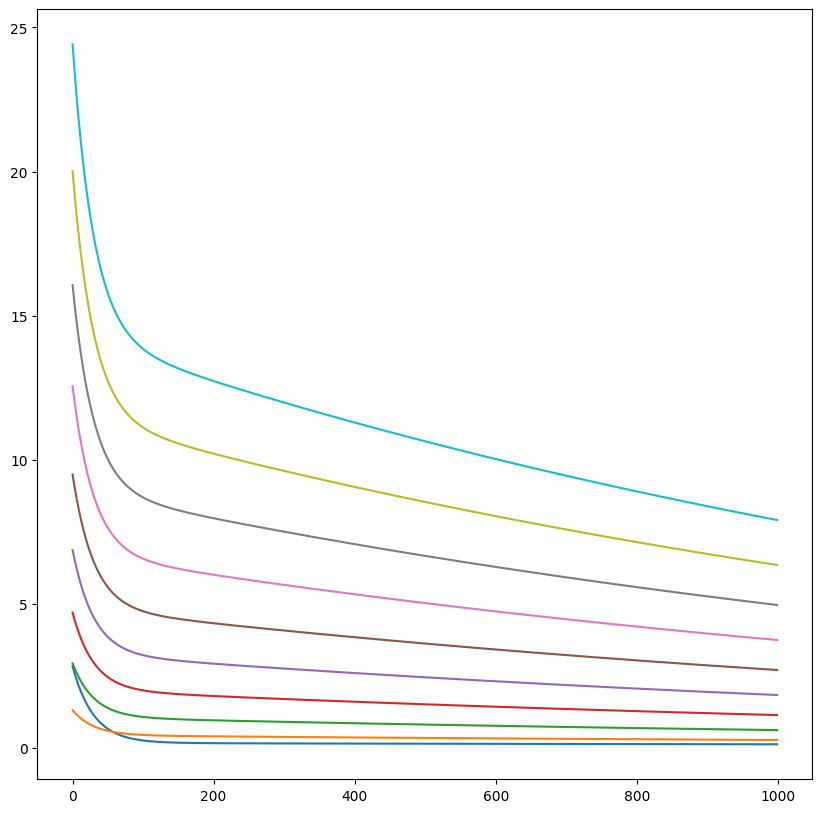

In [10]:
x = np.array([1, 2, 3, 4])
y = np.array([1.2, 2.8, 5.3, 6.4])
a, b = 1, 1
eta = 0.001
epochs = 1000
plt.rcParams["figure.figsize"] = (10, 10)

for i in range(10): # testing "b" parameter
    a, b, all_mse, mse = linear_reg(x, y, a, i, eta, epochs)
    print(f"Start value of 'b': {i} calculated a: {a} calculated b: {b}")
    plt.plot(range(epochs),all_mse)

Yet again - changing the 'b' parameter don't affect the stability but can slown down a little the algorithm.

Testing non-linear function:

Text(0, 0.5, 'loss')

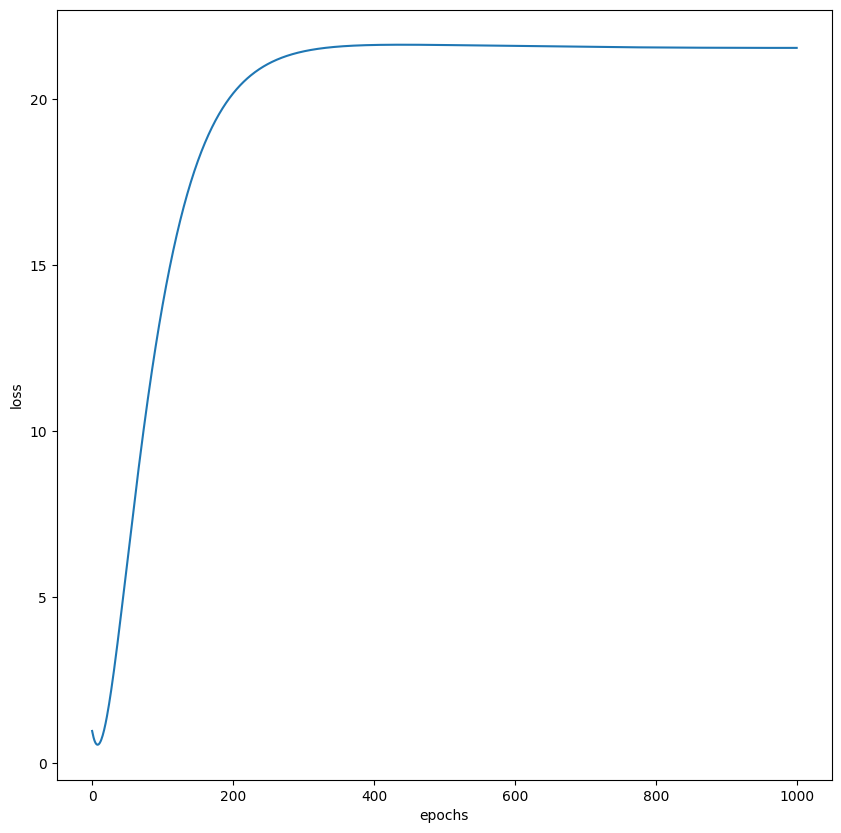

In [11]:
x = np.array([1, 2, 3, 4])
y = np.array([i**2 for i in range(1,5)]) # testing non linear function
a, b = 1, 1
eta = 0.001
epochs = 1000
a, b, all_mse, mse = linear_reg(x, y, a, b, eta, epochs)
plt.plot(range(epochs),all_mse)
plt.xlabel('epochs')
plt.ylabel('loss')

As we can see on the above plot the loss rises with every interation, so changing the approximated function to a non linear one affects the stability of the algorit. Simply - it's not the best itea to apply __linear__ regression on a __non linear__ function :)  